# KPI 아이디어 경진대회 EDA 1

이해원

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
customer = pd.read_csv('customers.csv')
loca = pd.read_csv('locations.csv')
odritem = pd.read_csv('order_items.csv')
odr = pd.read_csv('orders.csv')
pay = pd.read_csv('payments.csv')
prd = pd.read_csv('products.csv')
rev = pd.read_csv('reviews.csv')
seller= pd.read_csv('sellers.csv')

## 1. customers

- 고객 일련번호와 우편번호, 도시, 주

- 87,955행, 결측치 X

- Customer_unique_id: 다른 테이블에 key로 쓰이지 않음, 해당 컬럼이 있는 다른 테이블 자체가 없음

In [7]:
customer.head()

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
0,CUSTOMER_00000,CUSTOMER_Unique_00000,14409,franca,SP
1,CUSTOMER_00001,CUSTOMER_Unique_00001,9790,sao bernardo do campo,SP
2,CUSTOMER_00002,CUSTOMER_Unique_00002,1151,sao paulo,SP
3,CUSTOMER_00003,CUSTOMER_Unique_00003,8775,mogi das cruzes,SP
4,CUSTOMER_00004,CUSTOMER_Unique_00004,89254,jaragua do sul,SC


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_id              87955 non-null  object
 1   Customer_unique_id       87955 non-null  object
 2   Customer_zipcode_prefix  87955 non-null  int64 
 3   Customer_city            87955 non-null  object
 4   Customer_state           87955 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [9]:
customer.describe(include='all')

,Customer_id,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state
count,87955,87955,87955.000000,87955,87955
unique,87955,85112,NaN,3976,27
top,CUSTOMER_00000,CUSTOMER_Unique_12500,NaN,sao paulo,SP
freq,1,12,NaN,13486,36564
mean,NaN,NaN,35395.332716,NaN,NaN
std,NaN,NaN,29858.374668,NaN,NaN
min,NaN,NaN,1004.000000,NaN,NaN
25%,NaN,NaN,11618.500000,NaN,NaN
50%,NaN,NaN,24903.000000,NaN,NaN
75%,NaN,NaN,59150.000000,NaN,NaN


In [10]:
# 도시 nunique 3976
customer['Customer_city'].value_counts()

Customer_city
sao paulo                 13486
rio de janeiro             6018
belo horizonte             2459
brasilia                   1861
curitiba                   1352
                          ...  
uniao da serra                1
bequimao                      1
andarai                       1
santo antonio do caiua        1
eugenio de castro             1
Name: count, Length: 3976, dtype: int64

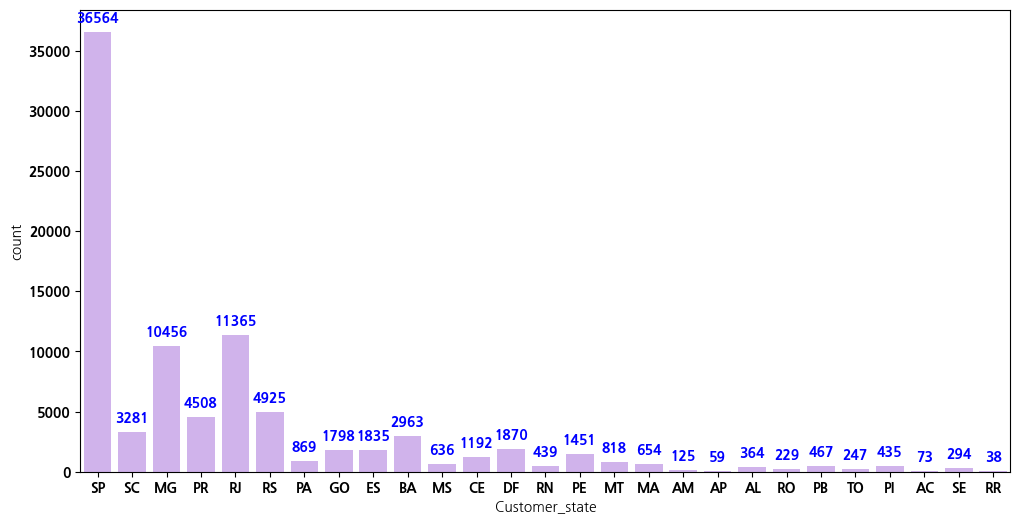

In [40]:
# 주 nunique 27
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=customer, x='Customer_state', color='#D0A9F5')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['text.color'] = 'blue'
plt.show()

## 2. locations

- 우편번호, 위도 경도, 도시, 주

- 1,000,163행, 결측치 X

In [29]:
loca.head()

,Geolocation_zipcode_prefix,Geolocation_lat,Geolocation_lng,Geolocation_city,Geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [41]:
loca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Geolocation_zipcode_prefix  1000163 non-null  int64  
 1   Geolocation_lat             1000163 non-null  float64
 2   Geolocation_lng             1000163 non-null  float64
 3   Geolocation_city            1000163 non-null  object 
 4   Geolocation_state           1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [45]:
# 초기 위치 = 상파울로의 위도, 경도
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=12)

for index, row in loca.iterrows():
    folium.Marker(location=[row['Geolocation_lat'], row['Geolocation_lng']],
                  popup=f"{row['Geolocation_city']}, {row['Geolocation_state']}",
                  icon=folium.Icon(color='blue')).add_to(m)

m

KeyboardInterrupt: 

## 3. order_items & orders

order_items 

- 주문번호, 물품 번호, 판매자 번호, 가격, 운임비

- 100,557행, 결측치 X

- Order_item_id vs Product_id: 

orders

- 주문번호, 고객번호, 배송상태, 구매일시, 배달업체에 수령된 일시, 고객에게 배송된 일시, 예상 배송 일시

- 87,955행, 결측치 X

In [50]:
display(odritem.head())
display(odritem.info())

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.9,13.29
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.9,19.93
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.0,17.87
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.9,18.14
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.9,12.69


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100557 entries, 0 to 100556
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_id       100557 non-null  object 
 1   Order_item_id  100557 non-null  int64  
 2   Product_id     100557 non-null  object 
 3   Seller_id      100557 non-null  object 
 4   Price          100557 non-null  float64
 5   Freight_value  100557 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


None

In [52]:
odritem.describe(include='all')

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
count,100557,100557.000000,100557,100557,100557.000000,100557.000000
unique,87954,NaN,29430,2761,NaN,NaN
top,ORDER_78678,NaN,PRODUCT_11967,SELLER_2194,NaN,NaN
freq,21,NaN,516,1873,NaN,NaN
mean,NaN,1.199678,NaN,NaN,119.821386,19.765626
std,NaN,0.713168,NaN,NaN,180.757135,15.358797
min,NaN,1.000000,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,74.900000,16.160000
75%,NaN,1.000000,NaN,NaN,133.900000,20.960000


In [51]:
display(odr.head())
display(odr.info())

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18
1,ORDER_00001,CUSTOMER_54059,delivered,2018-11-18 19:28:06,2018-11-22 13:39:59,2018-12-02 00:28:42,2018-12-15
2,ORDER_00002,CUSTOMER_59535,delivered,2019-02-13 21:18:39,2019-02-14 19:46:34,2019-02-16 18:17:02,2019-02-26
3,ORDER_00003,CUSTOMER_60516,delivered,2018-07-09 21:57:05,2018-07-11 14:58:04,2018-07-26 10:57:55,2018-08-01
4,ORDER_00004,CUSTOMER_76957,delivered,2018-05-16 13:10:30,2018-05-22 10:07:46,2018-05-26 12:55:51,2018-06-07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87955 entries, 0 to 87954
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Order_id                       87955 non-null  object
 1   Customer_id                    87955 non-null  object
 2   Order_status                   87955 non-null  object
 3   Order_purchase_timestamp       87955 non-null  object
 4   Order_delivered_carrier_date   87955 non-null  object
 5   Order_delivered_customer_date  87955 non-null  object
 6   Order_estimated_delivery_date  87955 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


None

In [53]:
odr.describe(include='all')

,Order_id,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date
count,87955,87955,87955,87955,87955,87955,87955
unique,87955,87955,2,87479,75514,87197,417
top,ORDER_00000,CUSTOMER_62232,delivered,2019-04-11 10:48:14,2019-05-09 15:48:00,2019-05-08 19:36:48,2018-12-20
freq,1,1,87949,3,47,3,507


In [54]:
odr['Order_status'].value_counts()

Order_status
delivered    87949
canceled         6
Name: count, dtype: int64

## 4. products

- 상품번호, 상품카테고리, 무게 길이 높이 너비

- 29,471행, 결측치 X

In [55]:
display(prd.head())
display(prd.info())

,Product_id,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
0,PRODUCT_00000,perfumery,225.0,16.0,10.0,14.0
1,PRODUCT_00001,arts,1000.0,30.0,18.0,20.0
2,PRODUCT_00002,sports_leisure,154.0,18.0,9.0,15.0
3,PRODUCT_00003,home_utilities,625.0,20.0,17.0,13.0
4,PRODUCT_00004,musical_instruments,200.0,38.0,5.0,11.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29471 entries, 0 to 29470
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product_id             29471 non-null  object
 1   Product_category_name  29471 non-null  object
 2   Product_weight_g       29471 non-null  object
 3   Product_length_cm      29471 non-null  object
 4   Product_height_cm      29471 non-null  object
 5   Product_width_cm       29471 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


None

In [56]:
prd.describe(include='all')

,Product_id,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
count,29471,29471,29471,29471,29471,29471
unique,29471,72,2092,100,103,95
top,PRODUCT_00000,bed_bath_table,200.0,16.0,10.0,11.0
freq,1,2755,1924,4927,2262,3300


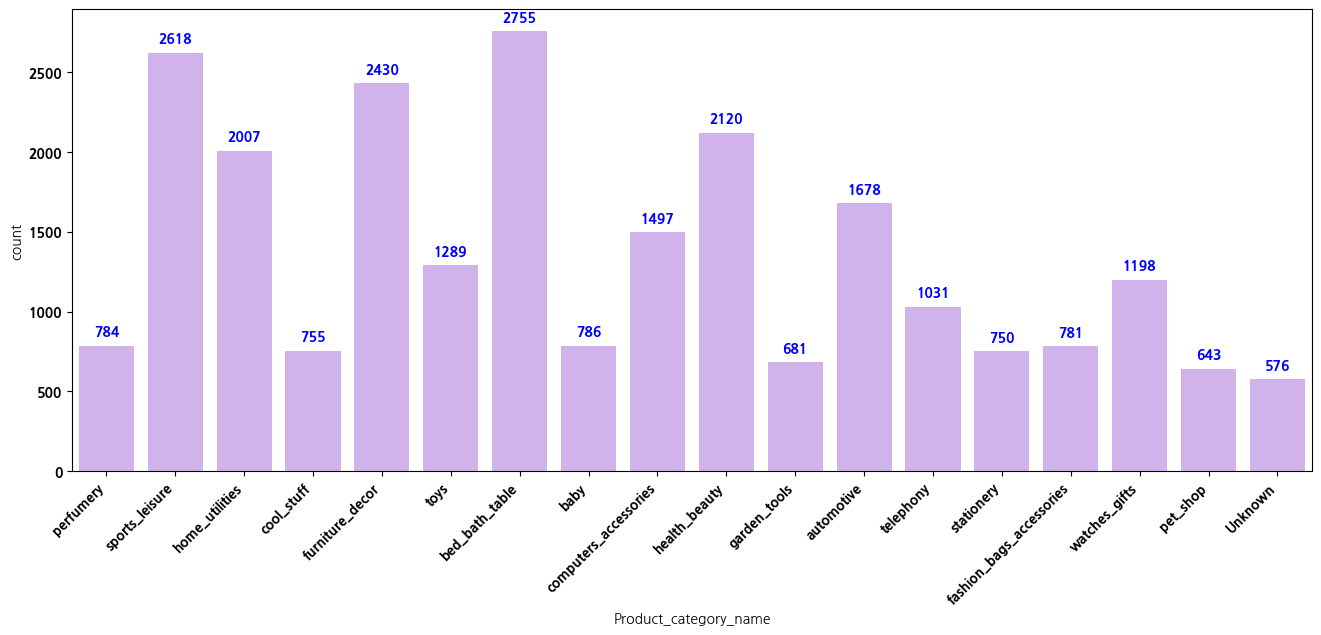

In [68]:
# 500개 이상 카테고리만

catover500 = prd['Product_category_name'].value_counts() >= 500
catover500 = catover500[catover500].index.tolist()

prd_filtered = prd[prd['Product_category_name'].isin(catover500)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(prd_filtered, x='Product_category_name', color='#D0A9F5')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['text.color'] = 'blue'
plt.xticks(rotation=45, ha='right')
plt.show()

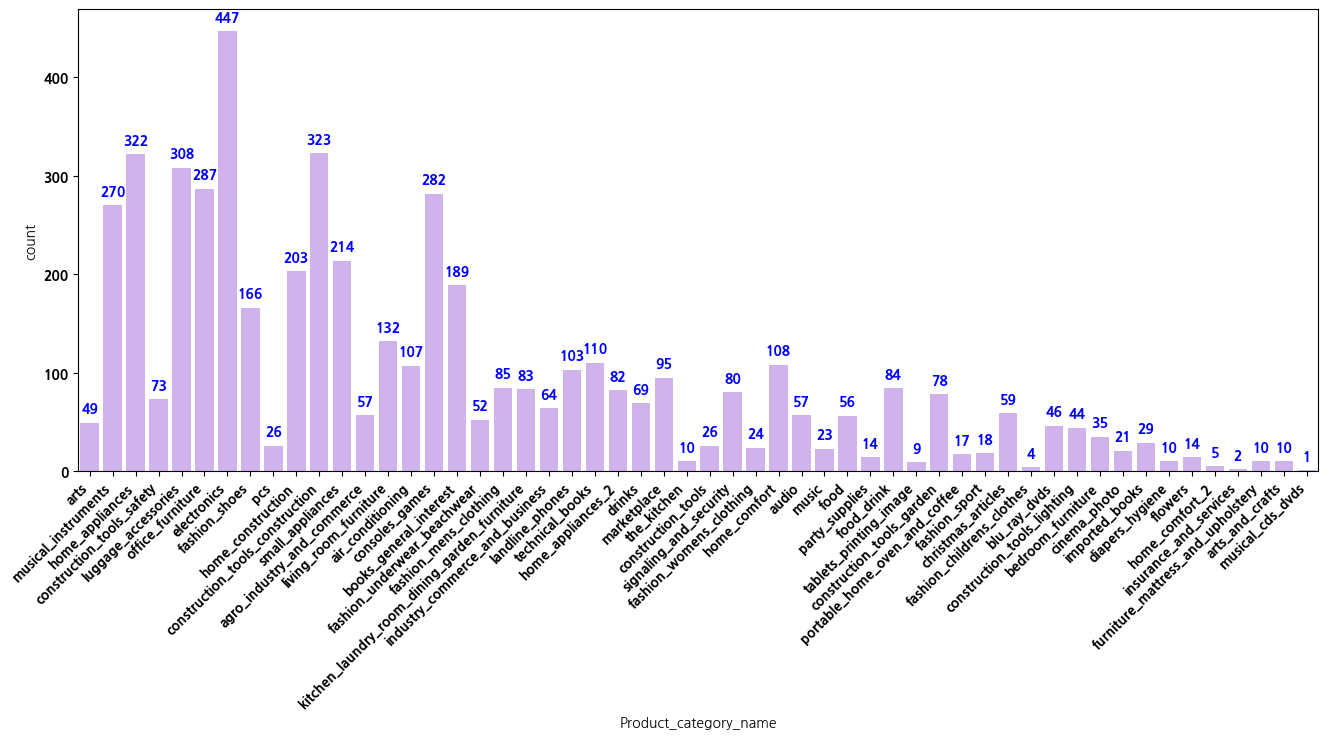

In [69]:
# 500개 미만 카테고리만

catunder500 = prd['Product_category_name'].value_counts() < 500
catunder500 = catunder500[catunder500].index.tolist()

prd_filtered = prd[prd['Product_category_name'].isin(catunder500)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(prd_filtered, x='Product_category_name', color='#D0A9F5')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['text.color'] = 'blue'
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. payments

- 주문번호, 결제순서?(한 주문에 여러 결제가 있을 경우의 순서), 결제방법, 분할납부횟수, 결제금액

- 91,971행, 결측치 X

In [70]:
display(pay.head())
display(pay.info())

,Order_id,Payment_sequential,Payment_type,Payment_installments,Payment_value
0,ORDER_66617,1,credit_card,8,99.33
1,ORDER_86954,1,credit_card,1,24.39
2,ORDER_38852,1,credit_card,1,65.71
3,ORDER_57443,1,credit_card,8,107.78
4,ORDER_11244,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91971 entries, 0 to 91970
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_id              91971 non-null  object 
 1   Payment_sequential    91971 non-null  int64  
 2   Payment_type          91971 non-null  object 
 3   Payment_installments  91971 non-null  int64  
 4   Payment_value         91971 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ MB


None

In [71]:
pay.describe(include='all')

,Order_id,Payment_sequential,Payment_type,Payment_installments,Payment_value
count,91971,91971.000000,91971,91971.000000,91971.000000
unique,87954,NaN,4,NaN,NaN
top,ORDER_68748,NaN,credit_card,NaN,NaN
freq,26,NaN,68100,NaN,NaN
mean,NaN,1.092464,NaN,2.862370,152.649857
std,NaN,0.676222,NaN,2.693001,213.587538
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.615000
50%,NaN,1.000000,NaN,1.000000,99.920000
75%,NaN,1.000000,NaN,4.000000,170.885000


-  Boleto: 브라질의 일반적 결제 방법. 온라인에서 주문 후 바코드가 있는 결제용 지급서 인쇄해서 은행, 우체국에 가서 현금 지불

-  바우처: 선불 상품권, 쿠폰

-  Debit Card: 체크카드

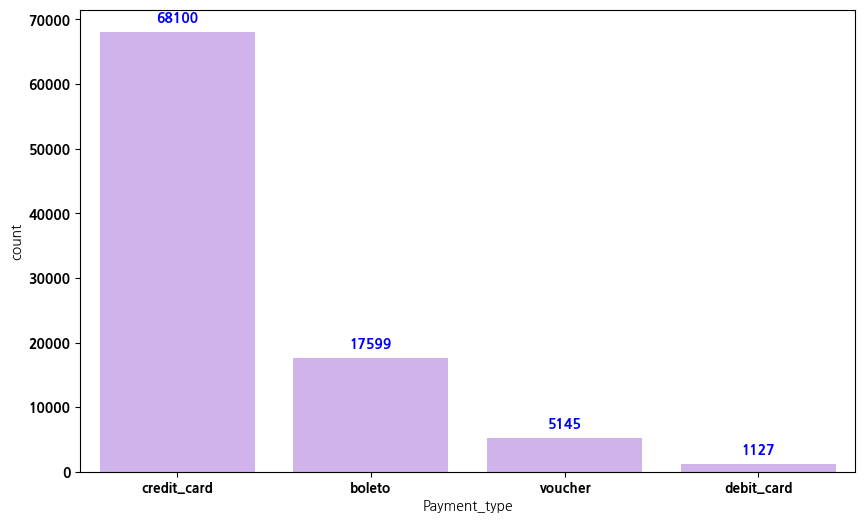

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=pay, x='Payment_type', color='#D0A9F5')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['text.color'] = 'blue'
plt.show()

## 6. reviews

- 리뷰번호, 주문번호, 평점(1~5), 리뷰작성일, 리뷰응답일시

- 87,873행, 결측치 X

In [74]:
display(rev.info())
display(rev.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87873 entries, 0 to 87872
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review_id                87873 non-null  object
 1   Order_id                 87873 non-null  object
 2   Review_score             87873 non-null  int64 
 3   Review_creation_date     87873 non-null  object
 4   Review_answer_timestamp  87873 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


None

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59
1,REVIEW_00001,ORDER_80140,5,2019-03-10 00:00:00,2019-03-11 03:05:13
2,REVIEW_00002,ORDER_69816,5,2019-02-17 00:00:00,2019-02-18 14:36:24
3,REVIEW_00003,ORDER_24398,5,2018-04-21 00:00:00,2018-04-21 22:02:06
4,REVIEW_00004,ORDER_70366,5,2019-03-01 00:00:00,2019-03-02 10:26:53


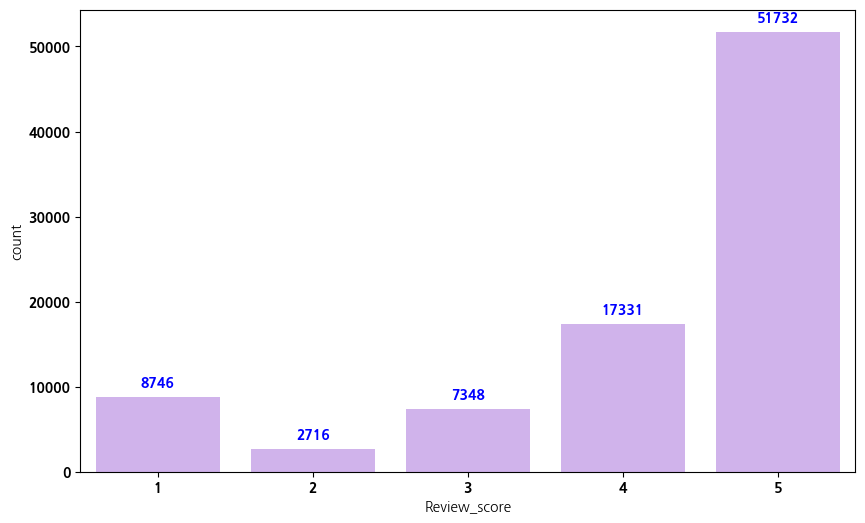

In [76]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=rev, x='Review_score', color='#D0A9F5')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# plt.rcParams['font.weight'] = 'bold'
# plt.rcParams['text.color'] = 'blue'
plt.show()

## 7. sellers

- 판매자번호, 판매자의 우편번호 / 시 / 주

- 2,763행, 결측치 X

In [77]:
display(seller.info())
display(seller.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Seller_id              2763 non-null   object
 1   Seller_zipcode_prefix  2763 non-null   int64 
 2   Seller_city            2763 non-null   object
 3   Seller_state           2763 non-null   object
dtypes: int64(1), object(3)
memory usage: 86.5+ KB


None

,Seller_id,Seller_zipcode_prefix,Seller_city,Seller_state
0,SELLER_0000,13023,campinas,SP
1,SELLER_0001,13844,mogi guacu,SP
2,SELLER_0002,12914,braganca paulista,SP
3,SELLER_0003,20920,rio de janeiro,RJ
4,SELLER_0004,55325,brejao,PE
